In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Obtener el dataset, asi como los subset de entrenamiento y de test
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Labels del dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Forma de nuestro dataset
train_images.shape

(60000, 28, 28)

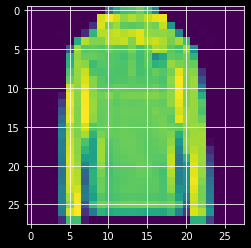

In [9]:
plt.style.use('dark_background')
plt.figure()
plt.imshow(train_images[24])
plt.grid(True)

In [10]:
# Normalizar las imagenes
train_images = train_images / 255.0
test_images = test_images / 255.0

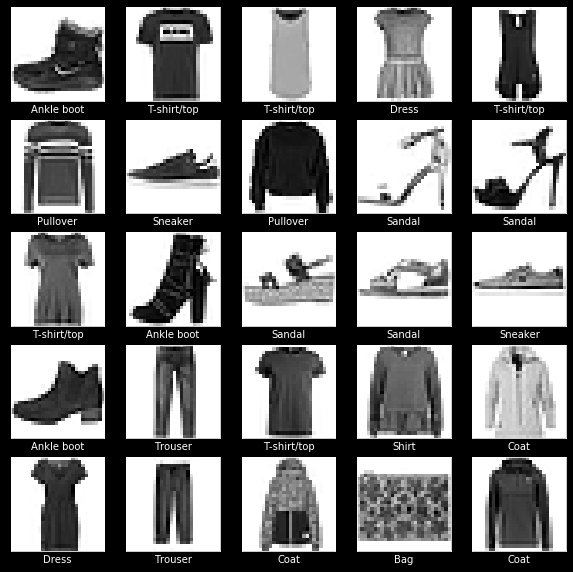

In [11]:
# Plotear el dataset con sus respectivas etiquetas
%matplotlib inline

plt.style.use('dark_background')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [13]:
# Crear el modelo
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Dense(10, activation=tf.nn.softmax)])

In [14]:
# Compilar modelo
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4981 - accuracy: 0.8238
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3760 - accuracy: 0.8649
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3360 - accuracy: 0.8774
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3153 - accuracy: 0.8843
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2948 - accuracy: 0.8926


In [16]:
# Verificar entrenamiento
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy: ', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy:  0.8704


In [17]:
# Obtener predicciones
predictions = model.predict(test_images)

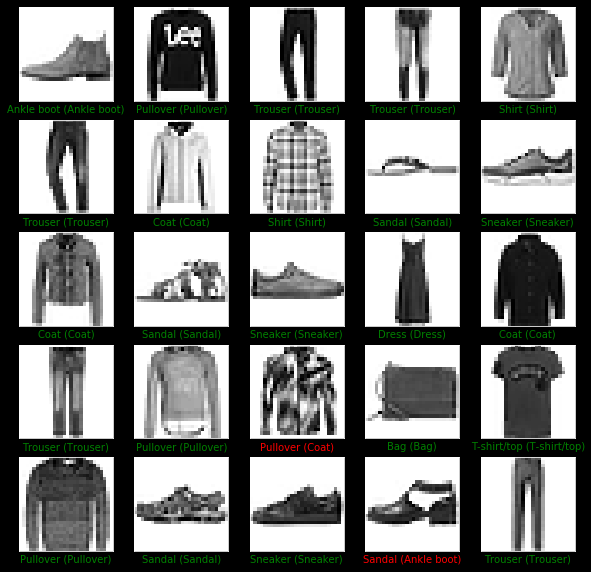

In [19]:
# Plotear las predicciones del modelo
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color=color)